### 예제
1.csv 폴더에 있는 파일 4개 로드 ( tran_1, tran_2,tran_d_1 ,tran_d_2 )
2. tran_1, tran_2 단순하게 행을 추가 결합 ( tran )
3. tran_d_1 ,tran_2 단순하게 행을 추가 결합 ( tran_d)
4. 2번,3번 과정에서 결합한 데이터프레임을 특정 조건에 맞춰서 left(tran) 를 기준으로 열 결합 ( transaction)


In [118]:
import pandas as pd

In [119]:
tran1 = pd.read_csv ('../CSV/tran_1.csv')
tran2 = pd.read_csv ('../CSV/tran_2.csv')
tran_d1 = pd.read_csv ('../CSV/tran_d_1.csv')
tran_d2 = pd. read_csv ('../CSV/tran_d_2.csv')
tran = pd.concat ([tran1,tran2], axis = 0, ignore_index= True)
tran_d = pd.concat ( [tran_d1,tran_d2], axis = 0, ignore_index= True)
transaction = pd.merge (tran, tran_d ,on ='transaction_id', how = 'left')
transaction

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1


In [120]:
tran = pd.concat ([tran1,tran2], axis = 0, ignore_index= True)
tran.head(2)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019


In [121]:
tran_d = pd.concat ( [tran_d1,tran_d2], axis = 0, ignore_index= True)
tran_d.head(2)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1


In [122]:
## 특정 조건에 맞춰서 tran 을 기준으로 열을 추가 결합 
## 특정 조건(transaction_id : 두가지 dataframe 의공통적인 조건 )
## how (left = tran)
transaction = pd.merge (tran, tran_d ,on ='transaction_id', how = 'left')
transaction

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1


### 데이터 결합2 
1. 파일로드 ( customer_master, item_master)
2. 1번 과정에서 불러온 2개의 데이터프레임을 transaction 의 조건에 맞게 조인 결합. 
3. 결합이 된 데이터프레임에서 quantity 컬럼과 item_price 컬럼을 가지고 total_price 새로운 컬럼을 추가 ( quantity x itme_price)
4. payment_data 컬럼을 시계열 데이터로 변경 

In [123]:
cm = pd.read_csv('../CSV/customer_master.csv')
im = pd.read_csv('../CSV/item_master.csv')


In [124]:
cm.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [125]:
im.head(1)

,item_id,item_name,item_price
0,S001,PC-A,50000


In [126]:
## transaction 과 CM 데이터프레임을 특정 조건으로 결합
## 공통 조건은 'customer_id ' 이다. 
join_data = pd.merge ( transaction , cm , on = 'customer_id', how ='left')
## customer_id 가 공통적인 column 에 해당
join_data.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0


In [127]:
total_df = pd.merge (join_data , im ,on = 'item_id', how ='left')
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000


In [128]:
total_df ['Total price'] = total_df ['quantity'] * total_df['item_price'] 


In [129]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,Total price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000


In [130]:
### payment_date 를 시계형으로 변경 
pd.to_datetime(total_df['payment_date'], format ='%Y-%m-%d %H:%M:%S')
## 실수하는 부분 
## total_df = pd.to_datetime(total_df['payment_date'], format ='%Y-%m-%d %H:%M:%S') 
## 모든 total_df 값이 series 로 변경됨. 


0      2019-02-01 01:36:57
1      2019-02-01 01:37:23
2      2019-02-01 02:34:19
3      2019-02-01 02:47:23
4      2019-02-01 04:33:46
               ...        
7139   2019-07-31 21:20:44
7140   2019-07-31 21:52:48
7141   2019-07-31 23:35:25
7142   2019-07-31 23:39:35
7143   2019-07-31 23:41:38
Name: payment_date, Length: 7144, dtype: datetime64[ns]

In [131]:
total_df['payment_date'] = pd.to_datetime(total_df['payment_date'], format ='%Y-%m-%d %H:%M:%S') 
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,Total price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000


In [132]:
## 시계열 데이터에서 년도-월 부분만 따로 추출 -> payment_month 컬럼 생성 
total_df['payment_date'].dt.strftime("%Y/%m") ## %y 는 두자리 년도

0       2019/02
1       2019/02
2       2019/02
3       2019/02
4       2019/02
         ...   
7139    2019/07
7140    2019/07
7141    2019/07
7142    2019/07
7143    2019/07
Name: payment_date, Length: 7144, dtype: object

In [133]:
total_df['payment_month'] = total_df['payment_date'].dt.strftime("%Y/%m") 
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,Total price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,2019/02


## 그룹화 예제
1. payment_month 를 기준으로 그룹화
2. total_price의 합계 , price 의 합계를 출력 
3. 2개의 합계를 matplotlib 을 이용하여 라이그래프로 시각화 ( subplot 이용)

In [134]:
total_df.groupby('payment_month')
total_df.groupby('payment_month').sum()

C:\Users\ezen\AppData\Local\Temp\ipykernel_2124\1429949039.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_df.groupby('payment_month').sum()


,price,detail_id,quantity,is_deleted,item_price,Total price
payment_month,,,,,,
2019/02,179190000,676866,1403,298.0,142805000,160185000
2019/03,175375000,2071474,1427,337.0,142980000,160370000
2019/04,176720000,3476816,1421,311.0,143670000,160510000
2019/05,171385000,4812795,1390,330.0,139655000,155420000
2019/06,183395000,6369999,1446,347.0,147090000,164030000
2019/07,188685000,8106846,1485,355.0,153215000,170620000


In [135]:
## 여기서 필요한 price 컬럼과 total price 컬럼
group_data= total_df.groupby('payment_month').sum()[['price','Total price']]

C:\Users\ezen\AppData\Local\Temp\ipykernel_2124\2278980487.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data= total_df.groupby('payment_month').sum()[['price','Total price']]


In [ ]:
##case2
total_df.groupby('payment_month').sum().loc[:, ['price','Total price']]

In [ ]:
##case3
total_df.groupby('payment_month').sum().iloc[:, [0, 5]]

In [138]:
import matplotlib.pyplot as plt

In [139]:
import platform

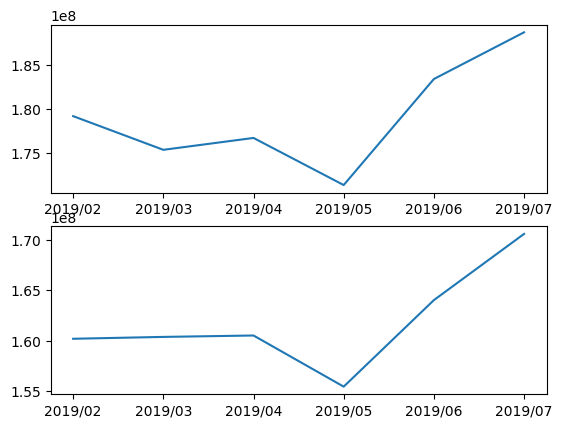

In [143]:
## 라인 그래프 시각화 
## subplot 을 이용하여 그래프를 2개 생성 
plt.subplot(2,1,1) ## 그래프를 두개 나눠서 첫번째를 선택하겠다 
plt.plot(group_data['price']) ## series data 가 x 축은 index, y축은 컬럼값이 입력
plt.subplot(2,1,2)
plt.plot(group_data['Total price'])
plt.show()

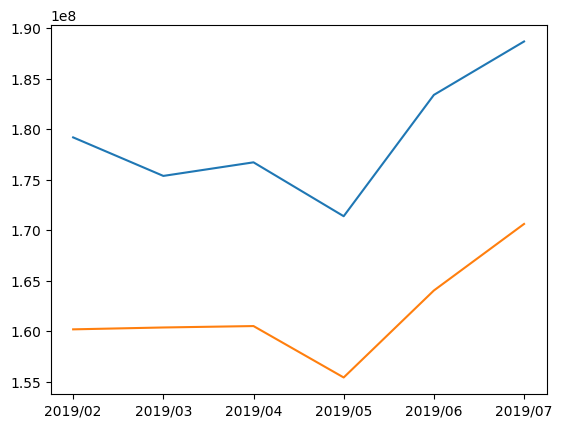

In [145]:
plt.plot(group_data)
plt.show()

## apply() 
1. 시리즈의 형태의 데이터에서 각 항목들을 하나씩 함수에 대입하여, 결과값을 시리즈의 형태로 리턴 함수 
2. apply ( 일반함수 ), apply ( lambda 함수)

### 예제3 
# 1. total_df 에서 gender 컬럼의 값들의 데이터를 확인
# 2. M,F,NaN 데이터가 있는것을 확인
# 3. M은 남자, F 는 여자, NaN는 무응답 으로 데이터를 변경 ( apply 사용)


In [180]:
total_df.head(1)
## M 데이터만 추출 마찬가지로 F / NAN 데이터만 추출 
## 결측치 확인 
total_df ['gender'].isna().sum()


1075

In [181]:
## 데이터의 분포 
total_df['gender'].value_counts()

M    3268
F    2801
Name: gender, dtype: int64

In [183]:
total_df['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
### gender 컬럼의 데이터를 m 은 남자, f 는 여자, NaN 은 무응답 변경 
## case1 (apply와 일반함수)
def change(x):
    print(x)  
    return x 
total_df ['gender'].apply (change) # gender 의 value 값을 그대로 받아서, apply 함수의 인자에 그대로 전달해서 출력

In [188]:
def change(x) :
    if x =='M':
       return '남자'
    elif x == 'F':
       return  '여자'
    else: 
       return '무응답'
total_df['gender'].apply(change)

0        남자
1        남자
2        여자
3        남자
4        남자
       ... 
7139    무응답
7140     남자
7141     여자
7142    무응답
7143     남자
Name: gender, Length: 7144, dtype: object